# MLB Pitcher Analysis

## Exploratory Data Analysis

In [4]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

## Data Import and Data Cleaning

In [181]:
#Import ibp_pitcher data and create pitcher dataframe
pitcher_df = pd.read_csv('../data/ibp_pitcher.csv')

#Overview of pitcher dataframe
pitcher_df

,x,z,spin_rate,release_velo,pitch_type,bats,release_x,release_y,release_z,pfx_x,pfx_z,extension,throws,bs_count,pitch_result,game_state,ump,pitcherid,catcherid,all_star
0,-11.445826,28.752272,2419.715355,97.969569,FF,R,-1.20,53.47,5.55,-3.98,9.55,7.026,R,0-1,ball,---:0,25,3,8,before
1,7.932074,0.661308,1887.946516,92.868261,CH,R,-1.10,53.36,5.49,-7.71,3.45,7.141,R,0-0,ball,---:2,25,3,8,before
2,7.619999,48.241619,2638.082228,96.269360,FF,R,-1.87,54.37,5.95,-6.73,10.92,6.134,R,0-0,ball,---:0,5,2,2,after
3,5.796095,41.052859,2574.160381,95.958868,FF,R,-1.85,54.34,5.92,-7.70,9.75,6.160,R,1/1/00,called_strike,---:0,5,2,2,after
4,-11.074292,17.918783,2043.591015,87.399737,CH,L,-1.93,54.11,5.74,-9.90,7.67,6.385,R,0-1,called_strike,---:1,5,2,2,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,20.579170,16.727929,2285.510566,83.371283,SL,R,-3.50,54.09,4.87,1.93,1.27,6.411,R,0-2,ball,12-:2,28,1,6,after
4858,-20.711453,36.165923,2463.950593,94.100880,FF,R,-3.36,54.34,5.32,-6.40,8.23,6.162,R,1/2/20,ball,12-:2,28,1,6,after
4859,-8.052185,42.179625,2508.893231,94.869668,FF,R,-3.50,54.50,5.05,-6.16,7.88,6.000,R,0-0,ball,1-3:2,28,1,6,after
4860,2.639002,31.271561,2526.083090,94.519083,FF,R,-3.35,54.22,5.26,-5.78,9.29,6.284,R,1/1/20,called_strike,1-3:2,28,1,6,after


In [182]:
#Create fix_date function to fix bs_count column, as there are some ball-strike counts that are appearing as dates
# and need to be formatted correctly
def fix_date(x):
    if '-' in x:
        return x
    else:
        return ('-').join(x.split('/')[0:-1])
    
#apply fix_date function to the bs_count column to clean/correct all values
pitcher_df['bs_count'] = pitcher_df['bs_count'].map(fix_date)

In [183]:
#replace '#VALUE!' values in game_state column with NaN values
pitcher_df['game_state'] = pitcher_df['game_state'].replace('#VALUE!', np.nan)

In [184]:
#Split bs_count column into 2 separate columns: ball_count and strike_count
#ball_count is the number of balls in the count, between 0-3 balls
#strike_count is the number of strikes in the count, between 0-2 strikes
pitcher_df[['ball_count', 'strike_count']] = pitcher_df.bs_count.str.split("-",expand=True)

#Split game_state column into 2 separate columns: baserunner_count and out_count
#baserunner_count is the total number of opposing players on base, between 0-3 players
#out_count is the total number of outs, between 0-2 outs
pitcher_df[['baserunner_count', 'out_count', 'col_to_be_removed']] = pitcher_df.game_state.str.split(":",expand=True)

#created the baserunner_on_first column to indicate if there is a baserunner on first base
pitcher_df['baserunner_on_first'] = pitcher_df['baserunner_count'].astype(str).map({'---': 0, '1--': 1, '-2-': 0,
                                                                                    '--3': 0, '12-': 1, '1-3': 1,
                                                                                    '-23': 0, '123': 1})
#created the baserunner_on_second column to indicate if there is a baserunner on second base
pitcher_df['baserunner_on_second'] = pitcher_df['baserunner_count'].astype(str).map({'---': 0, '1--': 0, '-2-': 1,
                                                                                    '--3': 0, '12-': 1, '1-3': 0,
                                                                                    '-23': 1, '123': 1})
#created the baserunner_on_third column to indicate if there is a baserunner on third base
pitcher_df['baserunner_on_third'] = pitcher_df['baserunner_count'].astype(str).map({'---': 0, '1--': 0, '-2-': 0,
                                                                                    '--3': 1, '12-': 0, '1-3': 1,
                                                                                    '-23': 1, '123': 1})

In [185]:
#fixing the baserunner_count observations to reflect whether there are between 0-3 baserunners
pitcher_df['baserunner_count'] = pitcher_df['baserunner_count'].str.replace('---','0').str.replace('1--','1')
pitcher_df['baserunner_count'] = pitcher_df['baserunner_count'].str.replace('-2-','1').str.replace('--3','1')
pitcher_df['baserunner_count'] = pitcher_df['baserunner_count'].str.replace('12-','2').str.replace('1-3','2')
pitcher_df['baserunner_count'] = pitcher_df['baserunner_count'].str.replace('-23','2').str.replace('123','3')

#fixing the out_count observations to reflect whether there are between 0-2 outs
pitcher_df['out_count'] = pitcher_df['out_count'].str.replace('00','0').str.replace('01','1').str.replace('02','2')

#changing the ball_count, strike_count, baserunner_count, and out_count types to integers
pitcher_df['ball_count'] = pitcher_df['ball_count'].astype(int)
pitcher_df['strike_count'] = pitcher_df['strike_count'].astype(int)
# pitcher_df['baserunner_count'] = pitcher_df['baserunner_count'].astype(int)
# pitcher_df['out_count'] = pitcher_df['out_count'].astype(int)

#dropping the bs_count, game_state, and col_to_be_removed columns, as they are no longer needed in our analysis
pitcher_df = pitcher_df.drop(['bs_count', 'game_state', 'col_to_be_removed'], axis = 1)

In [186]:
pitcher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 25 columns):
x                       4862 non-null float64
z                       4862 non-null float64
spin_rate               4812 non-null float64
release_velo            4862 non-null float64
pitch_type              4832 non-null object
bats                    4862 non-null object
release_x               4862 non-null float64
release_y               4862 non-null float64
release_z               4862 non-null float64
pfx_x                   4862 non-null float64
pfx_z                   4862 non-null float64
extension               4862 non-null float64
throws                  4862 non-null object
pitch_result            4862 non-null object
ump                     4862 non-null int64
pitcherid               4862 non-null int64
catcherid               4862 non-null int64
all_star                4862 non-null object
ball_count              4862 non-null int64
strike_count            4862 non

In [187]:
# pitcher_df[pitcher_df['out_count'].isna()]

In [188]:
pitcher_df.to_csv('../data/pitcher_df.csv')

In [171]:
#create dataframe of pitcher 1's data only
pitcher1 = pitcher_df[pitcher_df.pitcherid == 1]
# pitcher1.to_csv('../data/pitcher1.csv')

#create dataframe of pitcher 2's data only
pitcher2 = pitcher_df[pitcher_df.pitcherid == 2]
# pitcher2.to_csv('../data/pitcher2.csv')

#create dataframe of pitcher 3's data only
pitcher3 = pitcher_df[pitcher_df.pitcherid == 3]
# pitcher3.to_csv('../data/pitcher3.csv')

In [161]:
# check the number of missing (NAN) values in each pitcher dataframe
print(pitcher1.isna().sum())
print(pitcher2.isna().sum())
print(pitcher3.isna().sum())

# nfl_merged_df['round'].fillna('13', inplace=True)


x                    0
z                    0
spin_rate           22
release_velo         0
pitch_type           0
bats                 0
release_x            0
release_y            0
release_z            0
pfx_x                0
pfx_z                0
extension            0
throws               0
pitch_result         0
ump                  0
pitcherid            0
catcherid            0
all_star             0
ball_count           0
strike_count         0
baserunner_count     0
out_count           54
dtype: int64
x                    0
z                    0
spin_rate            9
release_velo         0
pitch_type           0
bats                 0
release_x            0
release_y            0
release_z            0
pfx_x                0
pfx_z                0
extension            0
throws               0
pitch_result         0
ump                  0
pitcherid            0
catcherid            0
all_star             0
ball_count           0
strike_count         0
baserunner_count     

In [ ]:
#create separate dataframes of pitcher 1's data for before and after the all star break
pitcher1_before = pitcher1[pitcher1.all_star == 'before']
pitcher1_after = pitcher1[pitcher1.all_star == 'after']

#create separate dataframes of pitcher 2's data for before and after the all star break
pitcher2_before = pitcher2[pitcher2.all_star == 'before']
pitcher2_after = pitcher2[pitcher2.all_star == 'after']

#create separate dataframes of pitcher 3's data for before and after the all star break
pitcher3_before = pitcher3[pitcher3.all_star == 'before']
pitcher3_after = pitcher3[pitcher3.all_star == 'after']

## Data Exploration and Data Visualizations

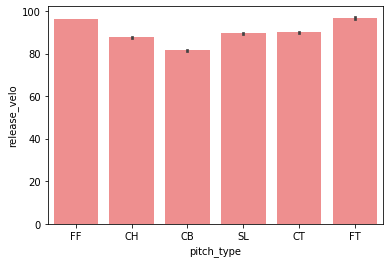

In [16]:
sns.barplot(
    x = pitcher_df['pitch_type'],
    y = pitcher_df['release_velo'],
    data=pitcher_df,
    color='red',
    alpha=0.5,
)

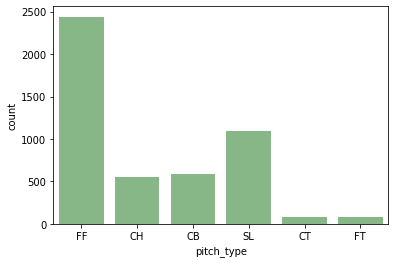

In [17]:
sns.countplot(
    x='pitch_type',
    data=pitcher_df,
    color='green',
    alpha=0.5,
)

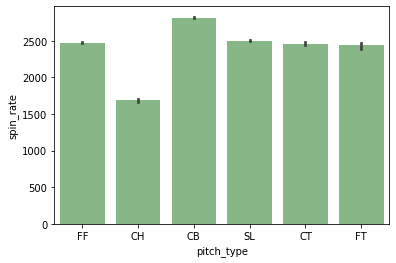

In [18]:
sns.barplot(
    x='pitch_type',
    y='spin_rate',
    data=pitcher_df,
    color='green',
    alpha=0.5,
)

strike vs ball

location vertically x per pitch type per bats
location horizontally z per pitch type per bats
spin_rate per pitch type
release_velo per pitch type
release horizontally release_x per pitch type per bats
release vertically release_z per pitch type per bats
release distance from home plate release_y
pitch movement horizontally pfx_x
pitch movement vertically pfx_z
extension
ump
catcher
runners on base
outs